In [169]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

I. Предобработка данных
=
## 1. Внешний вид 

In [235]:
df = pd.read_csv('medics_1.csv', sep=',', skipinitialspace=True, decimal=',')
df.columns = [col.lower().replace(',', '').replace('.', '').replace(" ", '_') for col in df.columns]

df.head(7)

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14.0,0,1,150,0,0,200,830,2900,900
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15.0,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17.0,0,1,210,0,0,250,0,1800,500
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16.0,1,3,210,71,43,500,1283,1700,1700
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15.0,1,3,265,116,74,500,1560,1800,1300
5,нет,Пациенты без ХБП,60,1,1,0,1,1,0,1,...,19.0,1,3,240,74,62,200,1350,2100,1800
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,15.0,1,3,185,94,59,500,600,400,2000


Названия колонок отформатированы, пропусков много. 


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   развитие_опп                 200 non-null    object 
 1   хбп                          200 non-null    object 
 2   возраст                      200 non-null    int64  
 3   пол                          200 non-null    int64  
 4   гб                           200 non-null    int64  
 5   сахарный_диабет              200 non-null    int64  
 6   стенокардия                  200 non-null    int64  
 7   инфаркт_миокарда             200 non-null    int64  
 8   мерцательная_аритмия         200 non-null    int64  
 9   желудочковая_экстрасистолия  200 non-null    int64  
 10  а-в_блокада                  200 non-null    int64  
 11  блокада_ножек_пучка_гиса     200 non-null    int64  
 12  сад                          200 non-null    int64  
 13  дад                 

## Дублирование

In [236]:
df.duplicated().sum()

1

In [237]:
df.drop_duplicates(inplace=True)

Возможная причина дубликата: данные об одном пациенте вносились в медицинскую базу данных повторно.

## 2. Пропуски, выбросы

**Добавим новую бинарную колонку "Есть_ли_пропуски"**  
          -1 - есть пропуск хотя бы в одной колонке.  
          - 0 - все данные есть.  
Заменять же пропуски будем по ходу работы с каждой колонкой отдельно. 

In [174]:
df['есть_ли_пропуски'] = df.isnull().any(axis=1).astype(int)
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,0,1,150,0,0,200,830,2900,900,0
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,1,4,235,143,121,600,640,900,800,1
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,0,1,210,0,0,250,0,1800,500,1
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,1,3,210,71,43,500,1283,1700,1700,0
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,1,3,265,116,74,500,1560,1800,1300,0


***

In [175]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    #plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

In [176]:
df['мочевина_'].isna().sum()

1

Всего один пропуск, скорее всего он случайный.

In [177]:
df[df['мочевина_'].isnull()]

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,1,2,200,95,44,500,920,1600,3200,1


**Для дальнейшего удобства работы с данными, введем новую колонку "Возрастная_группа"**
  - 18-30 - "до 30"
  - 31-40 - "от 31 до 40"
  - ...
  - 61-70 "от 61 до 70"
  - 71+ "от 71"

In [178]:
def determine_age(x):
    if x <= 30:
        return "до 30"
    elif 30 < x <= 40:
        return "от 31 до 40"
    elif 41 <= x <= 50:
        return "от 41 до 50"
    elif 51 <= x <= 60:
        return "от 51 до 60"
    elif 61 <= x <= 70:
        return "от 61 до 70"
    else:
        return "от 70"

df['возрастная_группа'] = df['возраст'].apply(lambda x: determine_age(x))
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски,возрастная_группа
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,1,150,0,0,200,830,2900,900,0,от 61 до 70
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,4,235,143,121,600,640,900,800,1,от 61 до 70
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,1,210,0,0,250,0,1800,500,1,от 41 до 50
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,3,210,71,43,500,1283,1700,1700,0,от 61 до 70
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,3,265,116,74,500,1560,1800,1300,0,от 51 до 60


Эту колонку мы создали для удобной группировки данных по возрасту пациента (особой разницы нет, 53 годы пациенту, или 54) 

Заменим пропуск данными, из таблицы, по колонкам, которые непосредственно [связанны с мочевиной в крови](https://gemotest.ru/info/spravochnik/analizy/mochevina-v-krovi/?ysclid=lutxxvppt3776924936).
> На результат анализа влияет возраст, пол, острые и хронические заболевания, беременность.

In [128]:
q = df.groupby(['возрастная_группа', 'пол', 'гб'])['мочевина_'].median()['от 51 до 60'][1][0]
q

5.0

In [180]:
df['мочевина_'].fillna(q, inplace=True)

___

In [183]:
df['хлориды'].unique()

array([100. ,   nan, 102. , 103. , 110.7, 100.5, 106. ,  99. , 105.7,
       104. , 109.8, 110. , 101. , 107.8, 107. ,  97. , 109. ,  98. ,
       115.1, 108.9, 108. , 114.4, 100.4, 109.7, 106.5, 102.8, 105. ,
       105.9, 102.4, 116.5, 115. , 104.6, 112. ,  99.8, 108.2, 108.3,
        96. ])

In [184]:
df['хлориды'].isna().sum()

22

В этой колонке уже больше пропусков.

In [185]:
df[df['хлориды'].isnull()].head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски,возрастная_группа
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,4,235,143,121,600,640,900,800,1,от 61 до 70
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,1,210,0,0,250,0,1800,500,1,от 41 до 50
6,есть,Стадия C1-C2,65,1,1,1,1,0,0,0,...,3,185,94,59,500,600,400,2000,1,от 61 до 70
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,1,150,0,0,400,0,1400,250,1,от 51 до 60
44,есть,Пациенты без ХБП,52,1,1,0,1,0,1,0,...,2,345,167,134,700,602,1600,1000,1,от 51 до 60


In [186]:
df['кальций'].unique()

array([0.99, 1.02, 0.96, 0.94, 0.85, 1.12, 1.22, 1.2 , 0.82, 0.9 , 1.1 ,
        nan, 1.13, 0.88, 1.14, 1.24, 1.01, 1.  , 1.11, 1.16, 0.98, 0.86,
       0.78, 0.79, 2.33, 0.89, 0.83, 0.8 , 0.87, 1.06, 1.05, 1.15, 1.26,
       1.21, 1.07, 0.73, 1.04, 0.72, 1.08, 1.09, 1.03, 0.95, 0.84, 0.71,
       2.4 , 0.7 , 1.6 , 0.75, 1.44, 2.32, 0.93, 1.17])

In [134]:
df['кальций'].isna().sum()

19

Проверим сколько есть пациентов, с пропусками в факторах кальций и хлориды.

In [192]:
query = (df['хлориды'].isnull()) & (df['кальций'].isnull())
a =  df.loc[query]
a

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски,возрастная_группа
13,нет,Пациенты без ХБП,57,1,1,0,1,0,0,1,...,1,150,0,0,400,0,1400,250,1,от 51 до 60
64,есть,Стадия C1-C2,54,1,1,0,1,1,0,0,...,1,245,0,0,250,0,1800,700,1,от 51 до 60
75,есть,Пациенты без ХБП,54,1,1,0,1,1,0,0,...,1,160,0,0,200,0,1700,1000,1,от 51 до 60
87,нет,Пациенты без ХБП,55,1,0,1,1,1,0,0,...,2,260,124,98,500,820,700,1400,1,от 51 до 60
93,нет,Пациенты без ХБП,53,1,0,0,1,1,1,0,...,2,200,95,44,500,920,1600,3200,1,от 51 до 60
104,есть,Пациенты без ХБП,46,0,0,0,1,1,0,0,...,2,170,67,44,500,1320,700,1700,1,от 41 до 50
173,есть,Стадия С3,60,1,1,0,1,1,0,0,...,3,230,79,58,500,1010,1750,3300,1,от 51 до 60
174,нет,Стадия C1-C2,40,1,1,0,1,0,0,0,...,1,170,0,0,250,0,1400,1000,1,от 31 до 40


In [136]:
for i in a.columns:
    if len(a[i].unique()) == 1:
        print(i, a[i].unique())

стенокардия [1]
а-в_блокада [0]
хлориды [nan]
кальций [nan]
есть_ли_пропуски [1]


У всех, у кого нет данных по хлоридам и кальцию есть заболевание стенокардия и не было проведена ав блокада.

> __Стенокардия__ – заболевание, обусловленное несоответствием между потребностью миокарда в кислороде и его доставкой, приводящее к нарушениям функций сердца.  
> __Атриовентрикулярная (АВ) блокада__ – частичное или полное прерывание проведения импульса от предсердий к желудочкам. Наиболее частой причиной является идиопатический фиброз или склероз проводящей системы сердца. Диагноз ставится на основании результатов электрокардиографии

Заполним хлорид и кальций усредненными значениями по факторам возрастная группа и наличию гб.

In [204]:
df['хлориды'] = df['хлориды'].fillna(
    df.groupby(['хсн', 'возрастная_группа'])['хлориды'].transform('median'))

In [205]:
df['кальций'] = df['кальций'].fillna(
    df.groupby(['возрастная_группа', 'хсн'])['кальций'].transform('median'))

In [206]:
df['кальций'].isna().sum(), df['хлориды'].isna().sum()

(0, 0)

***

In [139]:
df['рн'].unique()

array(['7,42', '7,49', '7,37', '7,44', '7,41', '8,35', '7,48', '7,43',
       '7,46', '7,55', '7,4', '7,45', '7,51', '7,47', '7,31', '7,39',
       '7,52', '7,34', '7,35', '7,38', '7,5', '2', '1.88', '2.01', '7,36'],
      dtype=object)

Изменим тип данных на правильный.

In [140]:
df['рн'] = df['рн'].str.replace(",", ".")
df = df.astype({'рн': float})

***

In [141]:
df['оксигем'].unique()

array([ 99. ,  98.8,  96.6,  99.4,  99.6,  98. ,  98.5,  99.9,  99.2,
       146. ,  97.4,  99.3,  99.7,  98.7,  97.8,  98.9,  97.9,  99.8,
        98.3,  98.1,  98.6,  99.5,  97.3,  93.9,  96.7,  97.7,  97. ,
        97.5,  66. ,  95.7,  97.6,  98.2,  96. ,  97.1,  99.1,  94.8,
        95.3,  98.4,  96.9])

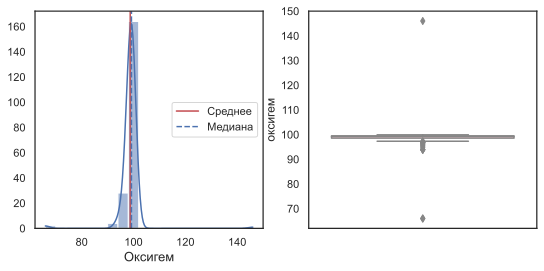

In [142]:
graph_histplot_bin(df, 'оксигем')

**Оксигем** - показатель крови, % (SaO2), проценты не могут быть > 100, изменим на медиану все значения, которые превышают 100

In [143]:
median = df[df['оксигем'] != 140]['оксигем'].median()

df['оксигем'] = df['оксигем'].apply(lambda x: median if x > 100 else x)

***

In [144]:
df['чсс'].unique()

array(['61', '66', '67', '94', '81', '74', '62', '83', '104', '88', '80',
       '91', '84', '77', '50', '119', '70', '79', '75', '68', '98', '73',
       '76', '60', '69', '57', '64', '1000', '58', '59', '7o', '65', '47',
       '54', '55', '56', '72', '41', '78', '46', '105', '82', '51', '52',
       '107', '115', '42', '93', '63', '44', '53', '49', '102'],
      dtype=object)

У фактора ЧСС неправильный тип данных из-за опечатки.

In [145]:
df['чсс'] = df['чсс'].replace('7o', '70')
df = df.astype({'чсс': np.int64})
df['чсс']

0      61
1      66
2      67
3      94
4      81
       ..
195    58
196    53
197    83
198    65
199    70
Name: чсс, Length: 199, dtype: int64

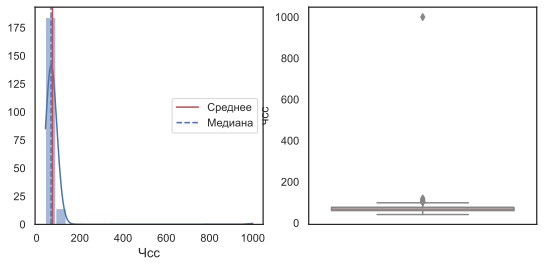

In [146]:
graph_histplot_bin(df, 'чсс')

Заменим на медиану аномальное значение 1000 ударов/минута.

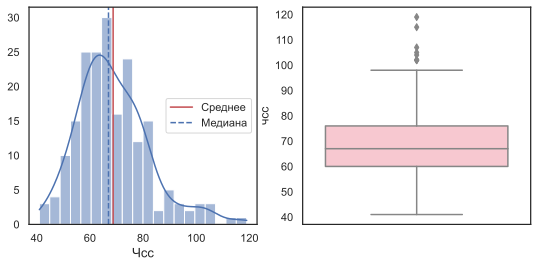

In [147]:
median = df[df['чсс'] != 1000]['чсс'].median()

df['чсс'] = df['чсс'].apply(lambda x: median if x == 1000 else x)

graph_histplot_bin(df, 'чсс')

***

In [148]:
df['мо'].unique()

array([ 6.78,  5.82,  4.26,  6.54,  4.98,  5.1 ,  5.22,  6.18,  5.86,
        5.52,  4.08,  5.34,  6.36,  4.62,  4.74,  5.94,  7.14,  5.28,
        6.12,  5.64,  3.18,  5.16,  8.1 ,  3.84,  7.74,  7.44,  4.86,
        8.58,  8.52,  7.56,  5.46,  4.38,  6.  ,  4.72,  4.68,  4.44,
        5.4 ,  4.2 ,  7.98,  5.76,  7.32,  6.96,  7.02,  6.42,  3.66,
        5.04,  3.96,  3.78,  4.5 ,  7.26,  6.06,  5.58,  4.56,  7.08,
        6.24,  2.34,  4.02,  9.18,  6.84,  8.04, 72.6 ,  6.3 ,  6.66,
        4.8 ])

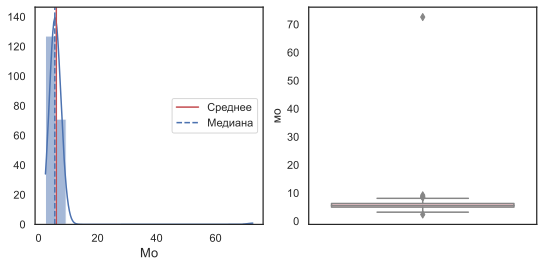

In [149]:
graph_histplot_bin(df, 'мо')

Для того чтобы проверить, является ли число 70 аномальным для минутного обьема сердца, рассмотрим данные о конкретном пациенте, с таким высоким показателем мо.

In [150]:
df.query("мо > 60")

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски,возрастная_группа
167,есть,Пациенты без ХБП,73,1,1,1,1,1,0,1,...,2,200,83,34,450,1440,1500,800,0,от 70


[У минутного объема сердца (МО) есть формула, по которой она рассчитывается.](http://vmede.org/sait/?id=Gospitalnaya_ter_card_storojakova_2008_t1&menu=Gospitalnaya_ter_card_storojakova_2008_t1&page=6&ysclid=lura2nfw6d323379373) Перепроверим, может ли быть МО = 70, посчитав ее по этой формуле.
> "Минутный объем сердца (МО) вычисляют умножением УО на число сердечных сокращений"

In [151]:
mo = np.round((df.query("мо > 60")['уо'] * df.query("мо > 60")['чсс']) / 1000, 2) # /1000 потому что уо в мл, а мо - в литрах
mo[167]

7.38

Таким образом, значение МО = 72.6 - выброс, заменим его вычисленным значением.

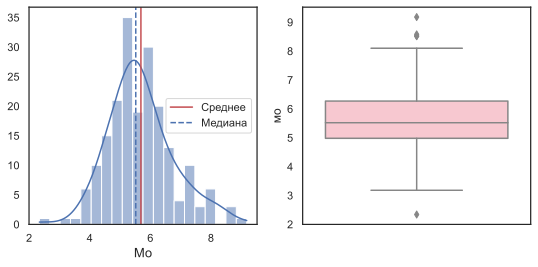

In [152]:
df['мо'] = df['мо'].apply(lambda x: mo[167] if x == 72.6 else x)
graph_histplot_bin(df, 'мо')

***

Ориентируясь на [данный источник](https://medsi-premium.ru/blog/triglitseridy/), выделим факторы, от которых зависит уровень триглицеридов в крови.
> Повышение уровня триглицеридов может быть следствием следующих факторов: 
> - ожирение,
> - сахарный диабет 2 типа и нарушение толерантности к глюкозе,
> - хроническая болезнь почек

In [219]:
df['триглицериды'].fillna(
    df.groupby(['сахарный_диабет', 'хбп'])['триглицериды'].transform('median'), inplace=True)

***

In [226]:
df['ачтв'].unique()

array([34. , 31. , 33. , 40. , 29. , 43. , 32. , 35. , 36. , 39. , 38. ,
       52.7, 44. , 55. , 26. , 30. , 48. , 42. , 49. , 37. , 30.9,  nan,
       51. , 25.9, 28. , 45. , 46. , 30.6, 41. ,  0.9, 34.6])

In [227]:
df['ачтв'].fillna(
    df.groupby(['гб', 'стенокардия'])['ачтв'].transform('median'), inplace=True)

***

In [153]:
df['кдр_правого_желудочка'].unique()

array([2.7, 2.6, 3. , 2.2, 2.3, 2.4, 2.5, 2.8, 2.9, 2.1, 3.1, 5.1, 3.3,
       3.2, 1.7, 2. ])

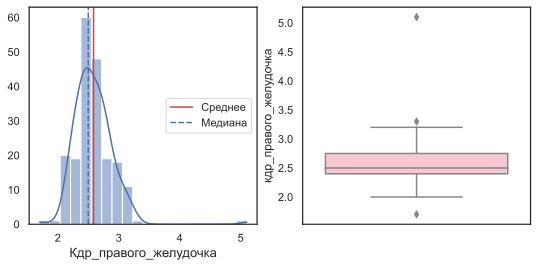

In [154]:
graph_histplot_bin(df, 'кдр_правого_желудочка')

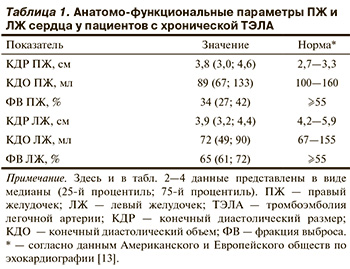

Значение 5 выбросом не является.

***

In [155]:
df['алат'].unique()

array([ 41,  39,  29,  19,  20,  49,  28,  18,  57,  30,  50,  11,  24,
        22,   8,  85,  25,  15,  37,  26,  34,  27,  12,  36,  17,  16,
        21,  88,  23,  10,  14,  35,  31,  44, 144,  72,  40,   7,  38,
        80,  32,  67,  33,  87,  56,  45,  13,  54,  42,  43,  59,  81,
        53,  65,  89,  51], dtype=int64)

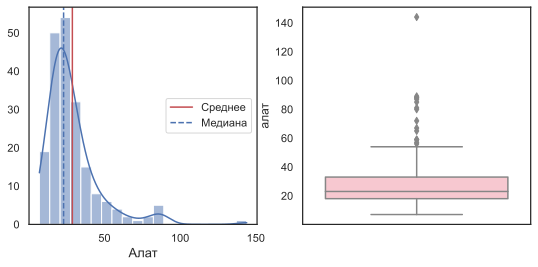

In [156]:
graph_histplot_bin(df, 'алат')

Норма у здорового человека **7—41 МЕ/л**

[Источник.](https://gemotest.ru/info/spravochnik/analizy/alt-alat-alaninaminotransferaza-alanintransaminaza/?ysclid=lusme893gj697663596) 
> В острой стадии заболевания концентрация АЛТ в крови может превышать норму в 10–40 раз. В хронической — в 2–5 раз.

[Подтвердим информацию другим источником:](https://yandex.ru/health/turbo/articles?id=4552&ysclid=lusmn6xb3d591388467)
> Острые вирусные и токсические гепатиты, при которых концентрация АЛТ возрастает в 20 раз и более. В некоторых случаях болезни Боткина увеличение концентрации данного фермента в крови может предшествовать желтушному окрашиванию кожи. При вирусных гепатитах В и С показатель АЛТ может увеличиваться даже в 100 раз, характеризуя при этом токсическое влияние вируса на клетки печени. У лиц с хроническими гепатитами повышение уровня описываемого фермента может служить маркером нового обострения заболевания. Однако в последнем случае АЛТ повышается не более, чем в 3-5 раз. 

Поэтому, хоть показатель 144 и выглядит как выброс, но такой показатель возможен, и показывыет на острую стадию заболевания.

***

Обнаружили еще пропуски.

In [201]:
df['лпнп'] = df['лпнп'].fillna(
    df.groupby(['хсн', 'возрастная_группа'])['лпнп'].transform('median'))
df['лпонп'] = df['лпонп'].fillna(
    df.groupby(['хсн', 'возрастная_группа'])['лпонп'].transform('median'))

***

In [160]:
df['толщина_паренхимы_почек'].unique()

array([14. , 15. , 17. , 16. , 19. ,  nan, 13. , 18. , 11. , 10. , 12. ,
       13.5])

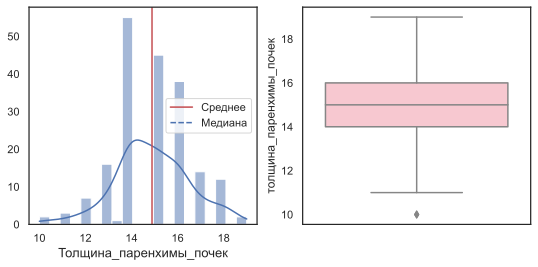

In [161]:
graph_histplot_bin(df, 'толщина_паренхимы_почек')

In [207]:
df['толщина_паренхимы_почек'] = df['толщина_паренхимы_почек'].fillna(
    df.groupby(['возрастная_группа'])['толщина_паренхимы_почек'].transform('median'))

***
### 3. Сформировать дополнительный столбец с данными по пациентам, прооперированным с использованием АИК, которым проводилось переливание крови


In [117]:
df['аик_с_гемотрансфузией'] = 0

df.loc[(df['аик'] == 1) & (df['объем_гемотрансфузии'] > 0), 'аик_с_гемотрансфузией'] = 1 
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,аик_с_гемотрансфузией
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,0,1,150,0,0,200,830,2900,900,0
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,1,4,235,143,121,600,640,900,800,1
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,0,1,210,0,0,250,0,1800,500,0
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,1,3,210,71,43,500,1283,1700,1700,1
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,1,3,265,116,74,500,1560,1800,1300,1


In [163]:
df.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,есть_ли_пропуски,возрастная_группа
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,1,150,0,0,200,830,2900,900,0,от 61 до 70
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,4,235,143,121,600,640,900,800,1,от 61 до 70
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,1,210,0,0,250,0,1800,500,1,от 41 до 50
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,3,210,71,43,500,1283,1700,1700,0,от 61 до 70
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,3,265,116,74,500,1560,1800,1300,0,от 51 до 60


Проверим распредение целевого фактора.

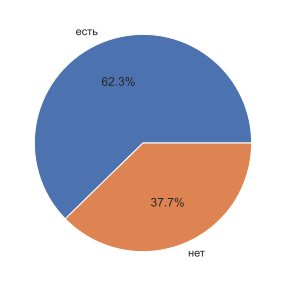

<Figure size 576x360 with 0 Axes>

In [46]:
column = df['развитие_опп'].to_frame().value_counts(normalize=True, sort=False).round(3) * 100
indexs = [i[0] for i in column.index.to_list()]

plt.pie(column, labels=indexs, autopct='%1.1f%%')
plt.figure()
plt.show()

Дальше посмотрим, как признаки связаны с целевым – с оттоком.

***
# II. Расчет, исследование

__Проверить адекватность поставленного диагноза по стадии
хронической болезни почек (найти параметр, по которому
ставится диагноз, использовать данные из внешних источников)__  

- Будем использовать параметр хбп

- Пациентов с скф больше 100 считаем пациентами без хбп

- Пациенты с скф в диапазоне 60-99 относим к 1 и 2 стадиям

- Пациенты с скф в диапазоне 30-59 относим к 3 стадии

- Пациентов с скф 15-29 относим к 4 стадии

- Пациентов с скф меньше 15 относим к 5 стадии

In [49]:
bins = [0, 15, 30, 60, 100, 200]
labels = ["Стадия C5", "Стадия C4", "Стадия С3", "Стадия C1-C2", "Пациенты без ХБП"]

df["хбп_нов"] = pd.cut(df['скф_расч'], bins=bins, labels=labels)

In [50]:
df[df['хбп'] != df['хбп_нов']][['скф_расч', 'хбп', 'хбп_нов']]

,скф_расч,хбп,хбп_нов
5,75.0,Пациенты без ХБП,Стадия C1-C2
7,65.0,Пациенты без ХБП,Стадия C1-C2
12,86.0,Пациенты без ХБП,Стадия C1-C2
13,64.0,Пациенты без ХБП,Стадия C1-C2
19,82.0,Пациенты без ХБП,Стадия C1-C2
...,...,...,...
190,58.0,Пациенты без ХБП,Стадия С3
191,108.0,Стадия C1-C2,Пациенты без ХБП
193,133.0,Стадия C1-C2,Пациенты без ХБП
194,78.0,Пациенты без ХБП,Стадия C1-C2


Почти половина диагнозов выставлена некорректно. Заменяем хбп для дальнейшего использования

In [51]:
df['хбп'] = df['хбп_нов']
df.drop('хбп_нов', axis=1, inplace=True)

__Посчитать процент пациентов с хроническими заболеваниям (сахарный диабет, гипертония, хроническая болезнь почек) для групп “есть ОПП/нет ОПП”__

In [52]:
df2 = pd.concat([df, pd.get_dummies(df['хбп'])], axis=1)

In [53]:
grouped = df2.groupby('развитие_опп')[['сахарный_диабет', 'гб', 'Пациенты без ХБП', 'Стадия C1-C2', 'Стадия С3']].sum()
grouped.iloc[0] /= len(df2[df2['развитие_опп'] == 'есть'])
grouped.iloc[1] /= len(df2[df2['развитие_опп'] == 'нет'])

In [54]:
grouped

,сахарный_диабет,гб,Пациенты без ХБП,Стадия C1-C2,Стадия С3
развитие_опп,,,,,
есть,0.346774,0.870968,0.241935,0.629032,0.129032
нет,0.306667,0.906667,0.186667,0.746667,0.066667


__Ввести новый фактор (описать и обосновать выбор фактора и его значений) на основе столбца “Индекс массы тела”.__

Индекс массы тела — величина, позволяющая оценить степень соответствия массы человека и его роста 
и тем самым косвенно судить о том, является ли масса недостаточной, нормальной или избыточной. 
Важен при определении показаний для необходимости лечения. Используем его, чтобы распределить людей в группы по их весу


16 и менее Выраженный дефицит массы тела

16—18,5 Недостаточная (дефицит) масса тела

18,5—25 Норма

25—30 Избыточная масса тела (предожирение)

30—35 Ожирение 1 степени

35—40 Ожирение 2 степени

40 и более Ожирение 3 степени

Выбор фактора обоснован тем, что у людей в разных весовых категориях разное состояние здоровья. Выбор значений обоснован тем, что удобнее всего распределить людей на 3 группы: с пониженным, нормальным и повышенным весом. Граничные значения взяты из интернета

In [55]:
bins = [0, 18.5, 25, 100]
labels = ["Ниже нормы", "Нормальный вес", "Выше нормы"]

df["весовая_категория"] = pd.cut(df["имт"], bins=bins, labels=labels)

In [56]:
df[['имт', 'весовая_категория']]

,имт,весовая_категория
0,30.0,Выше нормы
1,29.0,Выше нормы
2,30.0,Выше нормы
3,30.0,Выше нормы
4,33.0,Выше нормы
...,...,...
195,27.0,Выше нормы
196,29.0,Выше нормы
197,24.0,Нормальный вес
198,33.0,Выше нормы


__Посчитать количество пациентов, имеющих проблемы с
сердцем (выбор перечня проблем должен быть описан и
обоснован) для каждой группы. Сделать вывод.__

О проблемах с сердцем говорят следующий колонки:

Стенокардия - состояние боли в груди из-за недостаточного кровоснабжения сердца

Инфаркт миокарда - гибель части сердечной мышцы

Мерцательная аритмия - нарушение сердечного ритма

Желудочная экстрасистолия - аномальное сердцебиение, которое может привести к остановке сердца

А-в блокада - состояние, при котором электрические импульсы, идущие от предсердий к желудочкам, замедляются или блокируются

Блокада ножек пучка Гиса - нарушение проводимости электрических импульсов в сердце

In [57]:
weight_grouped = df.groupby('весовая_категория')[['стенокардия', 'инфаркт_миокарда',
                                                  'мерцательная_аритмия', 'желудочковая_экстрасистолия',
                                                  'а-в_блокада', 'блокада_ножек_пучка_гиса']].sum() 
                                                  # можно использовать sum так как принимаемые значения это 1 и 0

weight_grouped

,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,а-в_блокада,блокада_ножек_пучка_гиса
весовая_категория,,,,,,
Ниже нормы,0,0,0,0,0,0
Нормальный вес,36,28,9,4,1,4
Выше нормы,155,103,41,25,17,28


Вывод: у пациентов с весом выше нормы проблем с сердцем больше, чем у любых других. Однако, в самих записях таких пациентов больше. Для того чтобы учесть это, посчитаем сколько в среднем заболеваний у одного человека для групп с нормальным и повышенным весом. Нужно заметить, что в датасете не было людей с пониженным весом, поэтому мы не можем сделать вывод о этой группе людей

Для нормального веса:

(36 + 28 + 9 + 4 + 1 + 4) / 40 = 2.05 заболевания на человека в среднем

Для повышенного веса: 

(156 + 104 + 42 + 25 + 17 + 28) / 160 = 2.325 заболевания на человека

Можно предположить, что у людей с повышенной массой тела чаще пробелемы с сердцем. Также то, что у нас в датасете людей с повышенной массой тела в 4 раза больше чем здоровых, может указывать на то, что у таких людей чаще возникает опп и/или их чаще оперируют


Давайте также посмотрим на проценты людей с конкретными проблемами в группах

In [58]:
weight_grouped.iloc[1] /= 40
weight_grouped.iloc[2] /= 160

In [59]:
weight_grouped

,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,а-в_блокада,блокада_ножек_пучка_гиса
весовая_категория,,,,,,
Ниже нормы,0.00000,0.00000,0.00000,0.00000,0.00000,0.000
Нормальный вес,0.90000,0.70000,0.22500,0.10000,0.02500,0.100
Выше нормы,0.96875,0.64375,0.25625,0.15625,0.10625,0.175


Люди с весом выше нормы чаще встречаются со стенокардией, мерцательной аритмией, желудочковой экстрасистолией, а-в блокадой и блокадой ножек пучка гиса

In [60]:
df['весовая_категория'].value_counts()

Выше нормы        159
Нормальный вес     40
Ниже нормы          0
Name: весовая_категория, dtype: int64

__Исследовать зависимость длительности операции от факта
перенесенного в прошлом инфаркта миокарда__

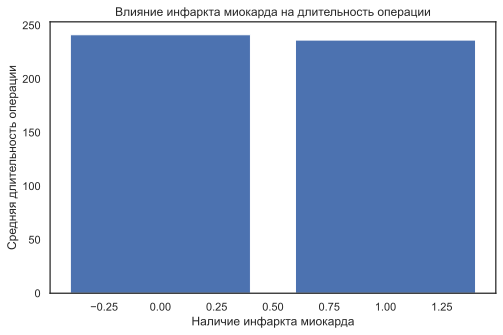

In [61]:
grouped = df.groupby('инфаркт_миокарда')['длительность_операции'].mean()

plt.bar(range(len(grouped)), grouped, align='center')

plt.xlabel('Наличие инфаркта миокарда')
plt.ylabel('Средняя длительность операции')

plt.title('Влияние инфаркта миокарда на длительность операции')

plt.show()

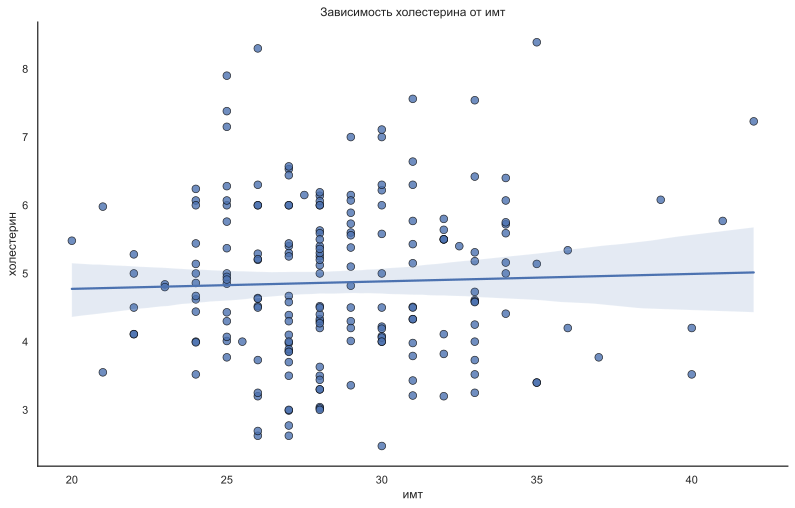

In [62]:
sns.set_style("white")
gridobj = sns.lmplot(x="имт", y="холестерин", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.xlabel('имт')
plt.ylabel('холестерин')

plt.title('Зависимость холестерина от имт')

plt.show()

Исходя из наших данных нельзя сказать, что ИМТ влияет на уровень холестерина. Данный вывод не соответствует общеизвестной информации о популяции, скорее всего это обусловлено маленьким датасетом и тем, что мы рассматриваем нездоровых людей

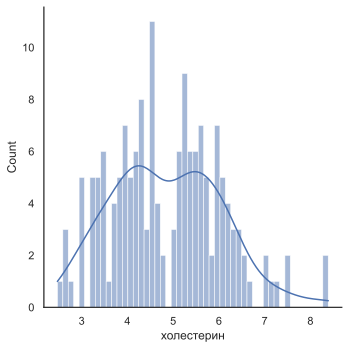

In [63]:
sns.displot(df[df['весовая_категория']=='Выше нормы']['холестерин'], kde=True, bins=50);

C:\Users\lolol\AppData\Local\Temp\ipykernel_23680\3098691756.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==1]['холестерин'], kde=True, bins=50)


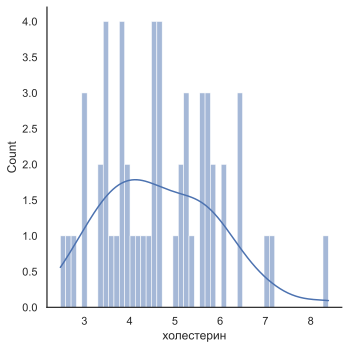

In [64]:
sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==1]['холестерин'], kde=True, bins=50)

C:\Users\lolol\AppData\Local\Temp\ipykernel_23680\419070255.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==0]['холестерин'], kde=True, bins=50)


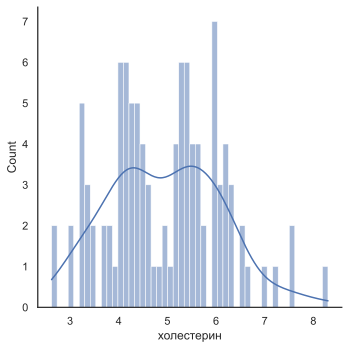

In [65]:
sns.displot(df[df['весовая_категория']=='Выше нормы'][df['сахарный_диабет']==0]['холестерин'], kde=True, bins=50)

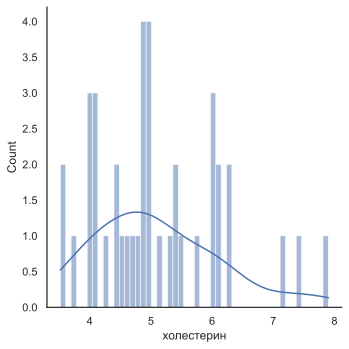

In [66]:
sns.displot(df[df['весовая_категория']=='Нормальный вес']['холестерин'], kde=True, bins=50)

Посмотрев на распределение, заметим что у людей с повышенной массой тела наблюдяются "падение" в районе холестерина равного 5, и есть повышения на значениях 4 и 6. У распределения людей с нормальной массой тела такого не наблюдается. Это интересная особенность данных. 

Мы также посмотрели на распределение людей с повышенной массой тела с сахарным диабетом и без, такое "падение" наблюдается только у людей с сахарным диабетом. 

__Верно ли, что даже без хронических болезней почек с
возрастом толщина паренхимы почек уменьшается?__

In [67]:
df2 = df2[df2['хбп'] == 'Пациенты без ХБП']

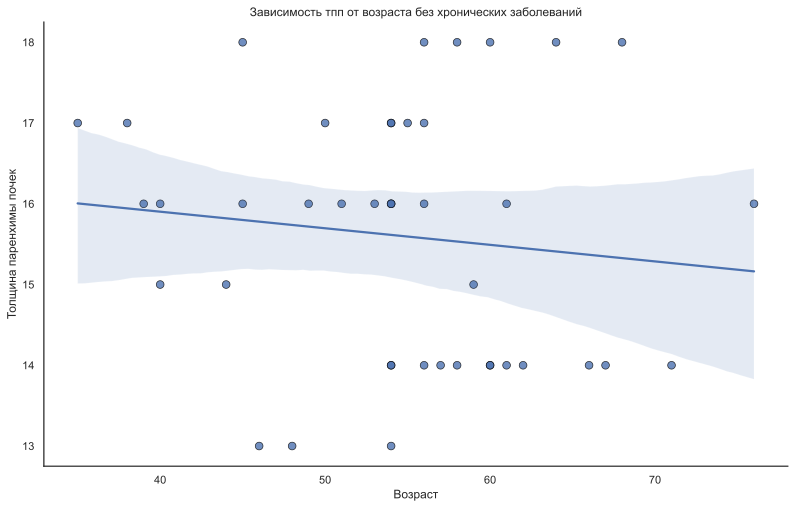

In [68]:
sns.set_style("white")
gridobj = sns.lmplot(x="возраст", y="толщина_паренхимы_почек", data=df2, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.xlabel('Возраст')
plt.ylabel('Толщина паренхимы почек')

plt.title('Зависимость тпп от возраста без хронических заболеваний')

plt.show()

Да, это верно

## Исследуем корелляцию


In [69]:
df_for_corr = df.copy()

# используем one_hot_encoding

df_for_corr['развитие_опп'] = df_for_corr['развитие_опп'].replace({'есть': 1, 'нет': 0})
df_for_corr = pd.get_dummies(df_for_corr)

In [70]:
correlation_matrix = df_for_corr.corr()

threshold = 0.74

# Создаем маску для отбора значений, где абсолютное значение корреляции выше порога
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Применяем маску к матрице корреляции для исключения строк с низкой корреляцией
correlation_matrix = correlation_matrix.loc[mask.any(axis=1), mask.any(axis=0)]

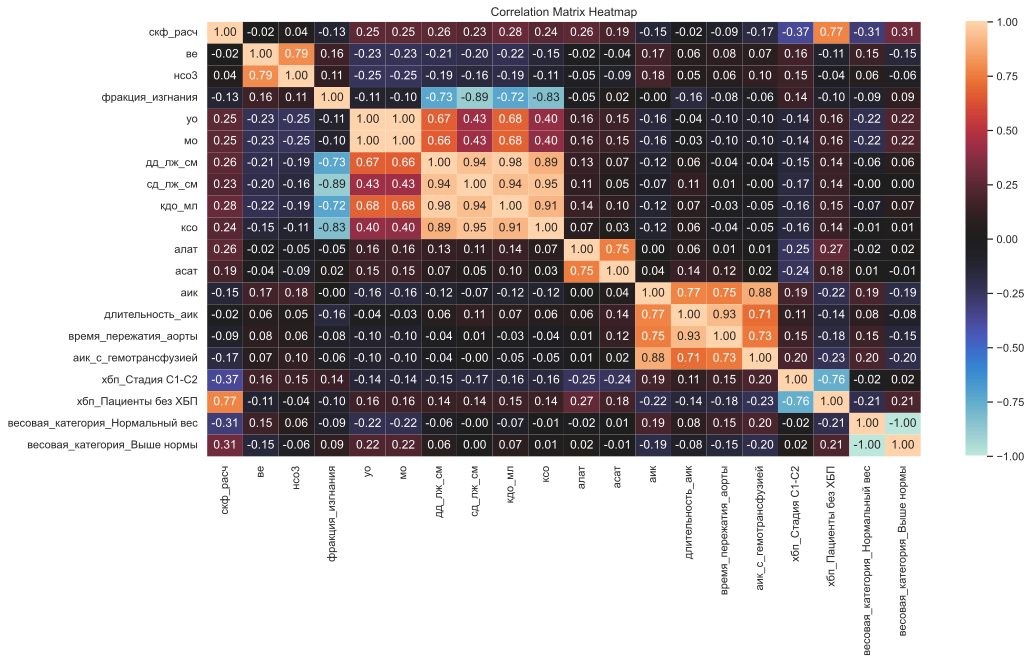

In [71]:
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='icefire', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Высокая корелляция наблюдается между:

ве и нсо3

фракцией изгнания и дд_лж_см, сд_лж_см, кдо_мл, ксо

дд_лж_см и сд_лж_см, кдо_мл, ксо

сд_лж_см и кдо_мл, ксо

кдо_мл и ксо

асат и алат

аик и длительность_аик, время_пережатия_аорты, аик_с_гемотрансфузией

длительность аик и время_пережатия_аорты, аик_с_гемотрансфузией

время_пережатия_аорты и аик_с_гемотрансфузией

диагнозами хбп

весовыми категориями

скф_расч и пациенты_без_хбп

Природа корреляции между ве и нсо3 зависит от множества факторов, включая специфическую патологию и общее состояние пациента.

Фракция изгнания (ФИ), которая оценивает, сколько крови выталкивается из сердца за каждое сокращение, может быть связана с параметрами, такими как диаметр левого желудочка в систолу (дд_лж_см) и его систолическая функция (сд_лж_см), которые отражают размер и работу сердца. Также, ФИ может коррелировать с кардиоваскулярным дебитом (КДО_мл) и кардиальным выбросом (КСО), которые оценивают, насколько эффективно сердце перекачивает кровь. Корелляция между всеми этими параметрами объясняется тем, что они описывают работу сердца

Корреляция между уровнями аспартатаминотрансферазы (АСАТ) и аланинаминотрансферазы (АЛАТ) в крови обычно обусловлена их схожими путями метаболизма в организме. Обе эти ферменты активно участвуют в обмене аминокислот

Корелляция между аик-колонками и временем пережатия аорты объясняется тем, что во время работы аик необходимо временно пережать аорту, чтобы хирург мог безопасно работать

Корелляция между диагнозами хбп объясняется тем, что когда 1 диагноз отмечен единицей, все остальные отмечены нулями. Также объясняется корелляция весовых категорий

Корелляция между параметрами аик объясняется очевидно, так как там все колонки так или иначе указывают на факт работы аик, а когда аик не работал, то все они принимают нулевые значения

Корелляция между скф_расч и пациенты_без_хбп объясняется тем, что диагноз ставится основываясь на скф